In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import jax.numpy as jnp
import cloudpickle

from cellrank.kernels import VelocityKernel
from cellrank.estimators import GPCCA
from moscot.problems.time import TemporalProblem
import moscot.plotting as mtp
import seaborn as sns
from cellrank.kernels import RealTimeKernel

# Original Data loading

In [2]:
Notochord = ['Notochord', 'Ciliated nodal cells']
Gut = ['Gut', 'Foregut epithelial cells', 'Pancreatic islets', 'Pancreatic acinar cells', 'Biliary epithelial cells']
Intermediate_mesoderm_and_kidney = ['Anterior intermediate mesoderm', 
                                    'Posterior intermediate mesoderm', 'Ureteric bud', 'Metanephric mesenchyme',
                                    'Collecting duct principal cells', 'Nephron progenitors',
                                    'Distal convoluted tubule', 'Ascending loop of Henle',
                                    'Podocytes', 'Proximal tubule cells', 'Connecting tubule', 
                                    'Collecting duct intercalated cells'
                                   ]
Eye_and_other = ['Naive retinal progenitor cells', 'Retinal progenitor cells', 'Ciliary margin cells', 
                 'Suprachiasmatic nucleus', 'Bipolar precursor cells', 'Photoreceptor precursor cells', 
                 'Rod precursor cells', 'Cone precursor cells'
                ]
Epithelial_cells = ['Placodal area', 'Olfactory epithelial cells', 'Olfactory bulb cells', 'Thyroid gland cells',
                    'Olfactory pit cells', 'Pituitary/Pineal gland progenitors', 'Thymic epithelial cells',
                    'Basal keratinocytes', 'Apical ectodermal ridge', 'Granular keratinocytes',
                    'Lens epithelial cells', 'Branchial arch epithelium', 'Conjunctival goblet cells',
                    'Corneal epithelial cells', 'Bladder urothelial cells', 'Parathyroid epithelial cells',
                    'Tooth junctional epithelium', 'Dental epithelial cells', 'Amniotic ectoderm', 
                    'Pre-epidermal keratinocytes', 'Otic epithelial cells'
                   ]
Glands = ['Nonsensory cochlear epithelium', 'Pineal gland', 'Pituitary gland cells', 'Cochlear hair cells']
Mesoderm = ['Chondrocytes (Atp1a2+)', 'Chondrocytes (Otor+)', 'Dermatome', 'Dermomyotome', 'Early chondrocytes',
            'Facial mesenchyme', 'Fibroblasts', 'Lateral plate and intermediate mesoderm', 
            'Limb mesenchyme progenitors', 'Mesodermal progenitors (Tbx6+)', 'Pre-osteoblasts (Sp7+)', 'Sclerotome'
           ]
Cardiocytes = ['Atrial cardiomyocytes', 'First heart field', 'Second heart field', 'Ventricular cardiomyocytes']
Aidpocytes = ['Adipocyte cells (Cyp2e1+)', 'Adipocyte progenitor cells', 'Brown adipocyte cells']
Muscle_cells = ['Muscle progenitor cells', 'Muscle progenitor cells (Prdm1+)', 'Myoblasts', 'Myofibroblasts',
                'Myotubes'
               ]
Testis_and_adrenal = ['Adrenocortical cells', 'Leydig cells']
Neural_crest_PNS_neurons = ['Dorsal root ganglion neurons', 'Enteric neurons', 'Neural crest (PNS neurons)',
                            'Otic sensory neurons', 'Parasympathetic neurons', 'Sympathetic neurons'
                           ]
Neural_crest_PNS_glia = ['Melanocyte cells', 'Myelinating Schwann cells', 'Myelinating Schwann cells (Tgfb2+)',
                         'Neural crest (PNS glia)', 'Olfactory ensheathing cells', 'Satellite glial cells'
                        ]
Olfactory_sensory_neurons = ['Corticofugal neurons', 'Olfactory sensory neurons']
Neuroectoderm_and_glia = ['Anterior floor plate', 'Anterior roof plate', 'Astrocytes', 'Diencephalon',
                          'Cerebellum-related cells', 'Dorsal telencephalon', 'Eye field', 'Floorplate and p3 domain',
                          'Hindbrain', 'Hypothalamus', 'Hypothalamus (Sim1+)', 'Midbrain', 
                          'Midbrain-hindbrain boundary', 'Multiciliated ependymal cells', 
                          'NMPs and spinal cord progenitors', 'Posterior roof plate', 'Retinal pigment cells', 
                          'Spinal cord/r7/r8', 'Telencephalon'
                         ]
CNS_neurons = ['Amacrine cells', 'Amacrine/Horizontal precursor cells', 'Cajal-Retzius cells', 
               'Cerebellar Purkinje cells', 'Cholinergic amacrine cells', 'Cranial motor neurons', 
               'GABAergic cortical interneurons', 'GABAergic neurons', 'Glutamatergic neurons', 'Horizontal cells',
               'Neural progenitor cells (Neurod1+)', 'Neural progenitor cells (Ror1+)', 'Neurons (Slc17a8+)',
               'PV-containing retinal ganglion cells', 'Retinal ganglion cells', 'Spinal cord dorsal progenitors', 
               'Spinal cord motor neurons', 'Spinal cord ventral progenitors', 'Thalamic neuronal precursors'
              ]
Ependymal_cells = ['Choroid plexus', 'Ependymal cells']
Olidendrocytes = ['Committed oligodendrocyte precursors', 'Oligodendrocyte progenitor cells']
Intermediate_neuronal_progenitors = ['Cortical Interneurons (Prox1+)', 'Deep-layer neurons', 
                                     'Intermediate neuronal progenitors', 'Subplate neurons', 'Upper-layer neurons'
                                    ]
Endothelium = ['Arterial endothelial cells', 'Brain capillary endothelial cells', 'Brain pericytes', 
               'Endocardial cells', 'Endothelium', 'Glomerular endothelial cells', 'Hematoendothelial progenitors',
               'Liver sinusoidal endothelial cells', 'Lymphatic vessel endothelial cells',
               'Microvascular endothelial cells', 'Pericytes', 'Venous and capillary endothelial cells'
              ]
Definitive_erythroid = ['Definitive early erythroblasts (CD36-)', 'Definitive erythroblasts (CD36+)']
B_cells = ['B cell progenitors', 'B cells']
Hepatocytes = ['Hepatocytes']
Intestine = ['Intestinal enteroendocrine cells', 'Intestinal goblet cells', 'Midgut/Hindgut epithelial cells']
Lung_and_airways = ['Airway club cells', 'Airway goblet cells', 'Alveolar Type 1 cells', 'Alveolar Type 2 cells',
                    'Lung cells (Eln+)', 'Lung progenitor cells'
                   ]
Mast_cells = ['Mast cells', 'Mast cells (P2rx7+)']
Megakaryocytes = ['Megakaryocytes']
Primitive_erythroid = ['Primitive erythroid cells']
T_cells = ['Activated T cells', 'Natural killer cells', 'Regulatory T cells', 'T cells']
White_blood_cells = ['Adipose tissue macrophages', 'Border-associated macrophages', 
                     'Border-associated macrophages (Cd74+)', 'Border-associated macrophages (Ms4a8a+)',
                     'Conventional dendritic cells', 'Granulocytes', 'Hematopoietic stem cells (Cd34+)',
                     'Hematopoietic stem cells (Mpo+)', 'Kupffer cells', 'Microglia', 'Monocytes', 
                     'Monocytic myeloid-derived suppressor cells', 'Osteoclasts', 
                     'PMN myeloid-derived suppressor cells', 'Plasmacytoid dendritic cells'
                    ]
Extraembryonic_visceral_endoderm = ['Extraembryonic visceral endoderm']
Primordial_germ_cells = ['Primordial germ cells']

liste1 = ['Notochord','Gut','Intermediate_mesoderm_and_kidney','Eye_and_other','Epithelial_cells','Glands','Mesoderm',
          'Cardiocytes','Aidpocytes','Muscle_cells','Testis_and_adrenal','Neural_crest_PNS_neurons',
          'Neural_crest_PNS_glia','Olfactory_sensory_neurons','Neuroectoderm_and_glia','CNS_neurons',
          'Ependymal_cells','Olidendrocytes','Intermediate_neuronal_progenitors','Endothelium','Definitive_erythroid',
          'B_cells','Hepatocytes','Intestine','Lung_and_airways','Mast_cells','Megakaryocytes','Primitive_erythroid',
          'T_cells','White_blood_cells','Extraembryonic_visceral_endoderm','Primordial_germ_cells'
         ]
liste2 = [Notochord,Gut,Intermediate_mesoderm_and_kidney,Eye_and_other,Epithelial_cells,Glands,Mesoderm,Cardiocytes,
          Aidpocytes,Muscle_cells,Testis_and_adrenal,Neural_crest_PNS_neurons,Neural_crest_PNS_glia,
          Olfactory_sensory_neurons,Neuroectoderm_and_glia,CNS_neurons,Ependymal_cells,Olidendrocytes,
          Intermediate_neuronal_progenitors,Endothelium,Definitive_erythroid,B_cells,Hepatocytes,Intestine,
          Lung_and_airways,Mast_cells,Megakaryocytes,Primitive_erythroid,T_cells,White_blood_cells,
          Extraembryonic_visceral_endoderm,Primordial_germ_cells
         ]

dic = {}

for i in range(len(liste1)):
    for celltype in liste2[i]:
        dic[celltype] = liste1[i]

In [3]:
%%time
adata = sc.read("/lustre/groups/ml01/workspace/monge_velo/data/adata_JAX_dataset_4.h5ad")
meta = pd.read_csv('/lustre/groups/ml01/workspace/monge_velo/data/df_cell.csv', index_col=0)
adata.obs['celltype'] = pd.Categorical(
    adata.obs['cell_id'].to_frame().merge(meta, on='cell_id', how='inner')['celltype_update']
)
adata.obs['major_trajectory'] = pd.Categorical(
    adata.obs['cell_id'].to_frame().merge(meta, on='cell_id', how='inner')['major_trajectory']
)
adata.obs['annotations_moscot'] = pd.Categorical(
    [dic[celltype] for celltype in adata.obs['celltype']]
)

CPU times: user 54 s, sys: 1min 3s, total: 1min 57s
Wall time: 2min 3s


# Select timepoints

In [4]:
%%time
leave_in = [18.00, 18.25]
adata_time = adata[adata.obs['day'].isin(leave_in)].copy()
del adata
adata_time.obs['day'] = adata_time.obs['day'].astype('category')
sc.pp.subsample(adata_time, n_obs=80000)

CPU times: user 3.4 s, sys: 2.68 s, total: 6.08 s
Wall time: 6.34 s


# Subsample

In [5]:
%%time
#adata_sub = sc.pp.subsample(adata_time, n_obs=100000, copy=True)
sc.pp.pca(adata_time)
#sc.pp.neighbors(adata_sub)
#sc.tl.umap(adata_sub)

CPU times: user 48.9 s, sys: 29.7 s, total: 1min 18s
Wall time: 1min 7s


## Plot data

In [6]:
#sc.pl.umap(adata_sub, color='day')

In [7]:
#sc.pl.umap(adata_sub, color='major_trajectory')

In [8]:
#sc.pl.umap(adata_sub, color='annotations_moscot')

In [48]:
adata_time.obs["source_marginals"] = np.ones(adata_time.n_obs)
#adata_time.obs["source_marginals"] -= (1-1/16)*(adata_time.obs['annotations_moscot']=='Glands')
adata_time.obs["source_marginals"] -= 0.5*(adata_time.obs['annotations_moscot']=='Olfactory_sensory_neurons')
adata_time.obs["source_marginals"] -= 0.5*(adata_time.obs['annotations_moscot']=='Olidendrocytes')
adata_time.obs["target_marginals"] = np.ones(adata_time.n_obs)
adata_time.obs["target_marginals"] += 1000*(adata_time.obs['annotations_moscot']=='Glands')

# Compute temporal problem

In [49]:
%%time
tp = TemporalProblem(adata_time)
tp = tp.prepare("day", joint_attr="X_pca", a='source_marginals')
tp = tp.solve(epsilon=1e-2,
              #initializer="random",
              #rank=5000,
              batch_size=2048
             )

INFO     Ordering Index(['run_27_PE-09F_S70.CTTAGCGGTGGTATCCGCC-11',                                               
                'run_23_PA-11F_S86.GATCGACCTTTCTTCCGGT-11',                                                        
                'run_27_PH-08E_S349.ATTGATCGTTTCTTGCCGAC-11',                                                      
                'run_23_PC-04F_S222.CAAGGCGTTAACCATTGGA-11',                                                       
                'run_23_PC-08G_S255.TATCCAGGTATATTGATAC-11',                                                       
                'run_23_PC-07G_S247.TTTGCTACTTATGGCTCTGC-11',                                                      
                'run_27_PG-08H_S256.TGAGAATCATGGTACCGGCA-11',                                                      
                'run_27_PG-07G_S247.GTCCTGCATCAAGGAGGTC-11',                                                       
                'run_27_PG-09G_S263.TCATGGCTTTGCGGACCTA-11',            

In [50]:
tp[(18.00, 18.25)].solution.to('cpu')

OTTOutput[shape=(40658, 39342), cost=8591840.0, converged=False]

In [51]:
myorder00 = adata_time[adata_time.obs['day']==18.00].obs['annotations_moscot'].unique().sort_values()
myorder25 = adata_time[adata_time.obs['day']==18.25].obs['annotations_moscot'].unique().sort_values()

In [52]:
res = tp.cell_transition(
    source=18.00,
    target=18.25,
    source_groups={'annotations_moscot': list(myorder00)},
    target_groups={'annotations_moscot': list(myorder25)},
    forward=True,
    key_added="tp_transitions",
    batch_size=4096
)

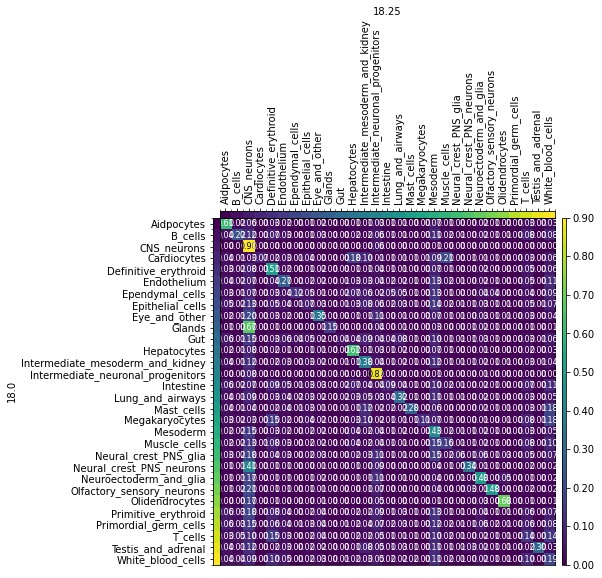

In [53]:
mtp.cell_transition(
    tp,
    fontsize=8,
    figsize=(5, 5),
    key="tp_transitions"
)

# Velocities

In [15]:
#tmk = RealTimeKernel.from_moscot(tp)
#tmk.compute_transition_matrix(self_transitions="all", conn_weight=0.2, threshold="auto")
#try:
#    tmk.plot_projection(connectivities=adata_sub.obsp['connectivities'], color='annotations_moscot')
#except:
#    pass